## GEV fit

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import genextreme
import single_loc_eval as sle
import matplotlib.pyplot as plt

from utils import roar_data_path as project_data_path
from utils import city_list

In [4]:
import importlib
importlib.reload(sle)

<module 'single_loc_eval' from '/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/src/single_loc_eval.py'>

In [5]:
# Set fonts
from matplotlib import font_manager
font_dirs = ["/storage/home/dcl5300/fonts"]

font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.linewidth"] = 1.5

In [37]:
# # Read
# city = 'boston'
# metric_id = 'max_tasmax'
# df_obs = pd.read_csv(f'{project_data_path}/metrics/cities/{city}_{metric_id}.csv')
# df_fit = pd.read_csv(f'{project_data_path}/extreme_value/cities/original_grid/freq/{city}_{metric_id}_1950-2100_mle_nonstat_nboot100_samples.csv')
# # df_fit = pd.read_csv(f'{project_data_path}/extreme_value/cities/original_grid/freq/{city}_{metric_id}_1950-2014_2050-2100_lmom_stat_nbootproj1000_nboothist1_samples.csv')

# # Get all coverage stats
# combos = df_fit.set_index(["ensemble", "gcm", "member", "ssp"]).sort_index().index.unique()
# # ensemble, gcm, member, ssp = combos[100]
# ensemble = 'LOCA2'
# gcm = 'ACCESS-CM2'
# member = 'r1i1p1f1'
# ssp = 'ssp585'
            
# qq_rmse = sle.gev_qq_plot(
#                 df_fit=df_fit,
#                 df_obs=df_obs,
#                 metric_id=metric_id,
#                 gcm=gcm,
#                 ssp=ssp,
#                 member=member,
#                 ensemble=ensemble,
#                 gev_type='nonstat',
#                 confidence_level=0.95,
#                 make_plot=True
# )

In [47]:
# Plot all
df_rmse = []
gev_type = 'stat'

for metric_id in ["max_tasmax", "min_tasmin", "max_pr"]:
    for city in city_list:
        # Read
        df_obs = pd.read_csv(f'{project_data_path}/metrics/cities/{city}_{metric_id}.csv')
        if gev_type == 'stat':
            df_fit = pd.read_csv(f'{project_data_path}/extreme_value/cities/original_grid/freq/{city}_{metric_id}_1950-2014_2050-2100_lmom_stat_nbootproj1000_nboothist1_samples.csv')            
        elif gev_type == 'nonstat':
            df_fit = pd.read_csv(f'{project_data_path}/extreme_value/cities/original_grid/freq/{city}_{metric_id}_1950-2100_mle_nonstat_nboot100_samples.csv')
            
        # Get all RMSEs
        combos = df_fit.set_index(["ensemble", "gcm", "member", "ssp"]).sort_index().index.unique()

        for combo in combos[:50]:
            ensemble, gcm, member, ssp = combo
            # Calculate QQ RMSE
            rmse = sle.gev_qq_plot(
                df_fit=df_fit,
                df_obs=df_obs,
                metric_id=metric_id,
                gcm=gcm,
                ssp=ssp,
                member=member,
                ensemble=ensemble,
                gev_type=gev_type,
                make_plot=False
                )
            # Append
            df_rmse.append({"city":city,
                            "metric_id":metric_id,
                            "ensemble":ensemble,
                            "gcm":gcm,
                            "member":member,
                            "ssp":ssp,
                            "rmse":rmse})

# Concat
df_rmse = pd.DataFrame(df_rmse).dropna()

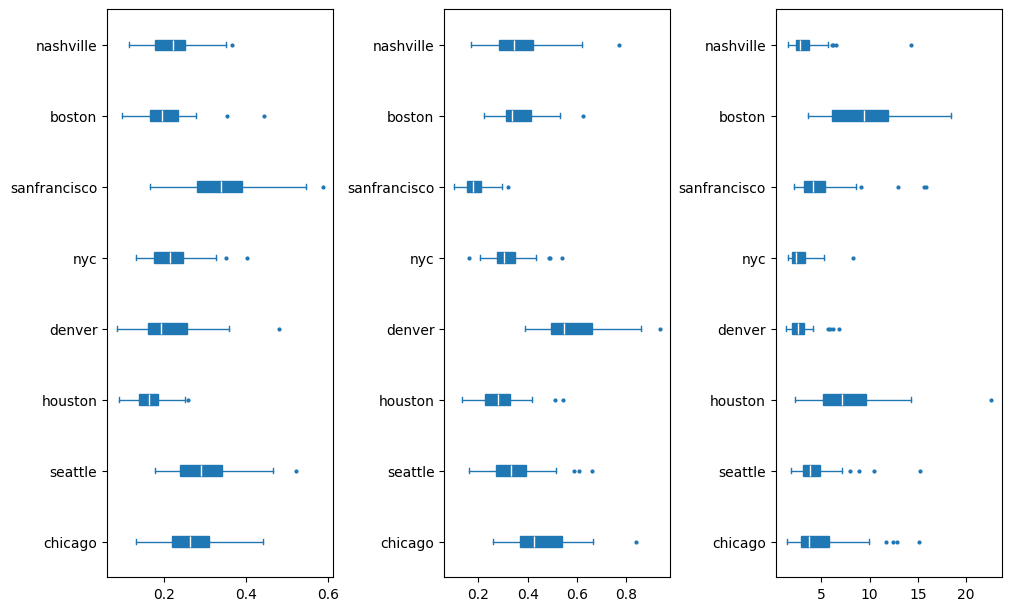

In [48]:
# Plot
fig, axs = plt.subplots(1, 3, figsize=(10,6), layout='constrained')

c='C0'

for idm, metric_id in enumerate(["max_tasmax", "min_tasmin", "max_pr"]):
    ax = axs[idm]
    for idc, city in enumerate(list(city_list.keys())):
        data = df_rmse[(df_rmse['city'] == city) & (df_rmse['metric_id'] == metric_id)]
        ax.boxplot(x = data['rmse'],
                   positions = [idc],
                   vert=False,
                   patch_artist=True,
                   boxprops=dict(facecolor=c, color=c),
                   capprops=dict(color=c, lw=1),
                   whiskerprops=dict(color=c, lw=1),
                   flierprops=dict(color=c, markerfacecolor=c, markeredgecolor=c, markersize=2),
                   medianprops=dict(color='white', lw=1))
    ax.set_yticklabels(list(city_list.keys()))
plt.show()